<a href="https://colab.research.google.com/github/Adhza/Stunting_Balita/blob/main/Forecasting%20Covid%20Data%20with%20Stats%20Algorithm%20Holt%20Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.statespace.tools as sts
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Input Data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cek.csv to cek.csv


# Panggil Data

In [ ]:
datacovid = pd.read_csv("cek.csv")

In [ ]:
datacovid.head(60)

,Tanggal,Kasus_Positif,Kasus_Sembuh,Kasus_Meninggal
0,2021-10-01,1624,2811,87
1,2021-10-02,1414,2380,89
2,2021-10-03,1142,2020,58
3,2021-10-04,922,2656,88
4,2021-10-05,1404,2558,77
5,2021-10-06,1484,2851,75
6,2021-10-07,1393,1946,81
7,2021-10-08,1384,3514,66
8,2021-10-09,1167,1507,52
9,2021-10-10,894,1584,39


# Cek Type Data

In [ ]:
datacovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal          59 non-null     object
 1   Kasus_Positif    59 non-null     int64 
 2   Kasus_Sembuh     59 non-null     int64 
 3   Kasus_Meninggal  59 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


# Proses Ubah Data menjadi Time Series

In [ ]:
# proses prubahan data agar menjadi time series dengan periode harian

nobs = len(datacovid)
dates = pd.date_range('2021-10-01', freq = "D", periods = nobs)
datacovid.index = pd.Index(dates)
del datacovid['Tanggal']

In [ ]:
datacovid.head()

,Kasus_Positif,Kasus_Sembuh,Kasus_Meninggal
2021-10-01,1624,2811,87
2021-10-02,1414,2380,89
2021-10-03,1142,2020,58
2021-10-04,922,2656,88
2021-10-05,1404,2558,77


In [ ]:
datacovid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2021-10-01 to 2021-11-28
Freq: D
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Kasus_Positif    59 non-null     int64
 1   Kasus_Sembuh     59 non-null     int64
 2   Kasus_Meninggal  59 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


# Plot Data secara Time Series

In [ ]:
# plot data kasus positif
datacovid['Kasus_Positif'].plot(figsize=(20,10))

NameError: ignored

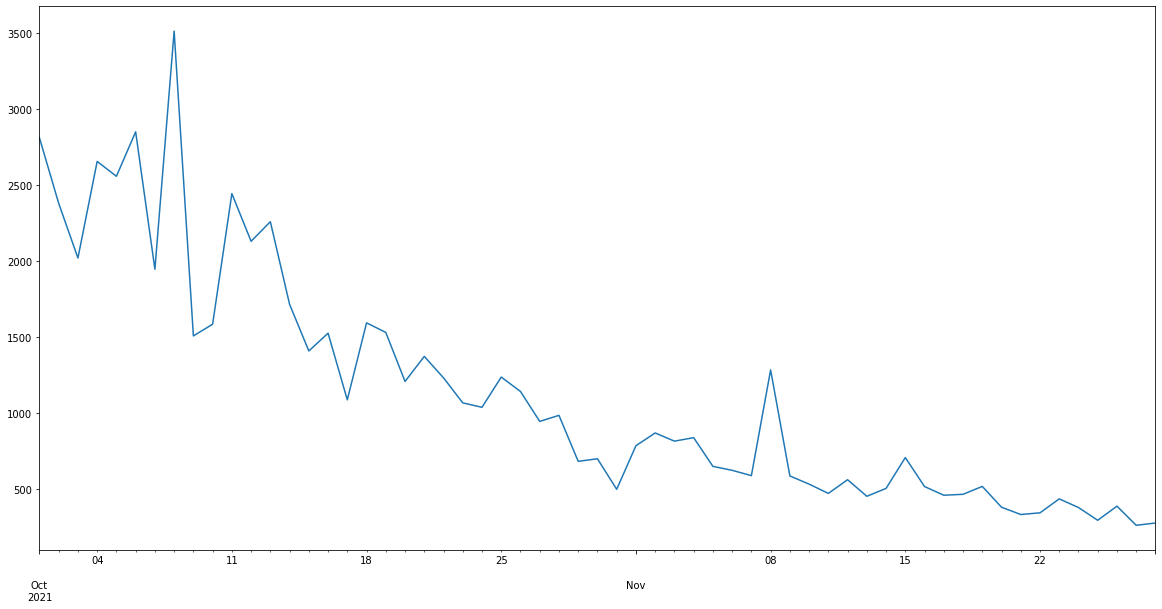

In [ ]:
# plot data kasus positif
datacovid['Kasus_Sembuh'].plot(figsize=(20,10))

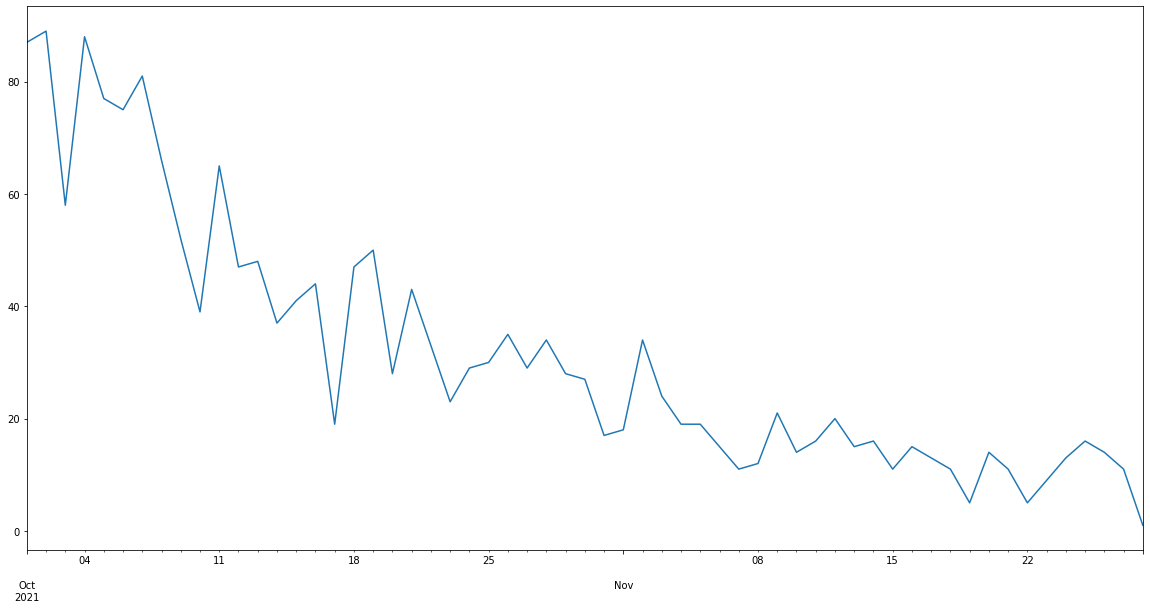

In [ ]:
# plot data kasus meninggal
datacovid['Kasus_Meninggal'].plot(figsize=(20,10))

# Uji untuk Mengetahui Adanya Musiman dan Tren

In [ ]:
# Uji stasioneritas kasus positif

from statsmodels.tsa.stattools import adfuller
print ('Results of Dicky-Fuller Test Kasus Positif :')
dftest = adfuller(datacovid['Kasus_Positif'],
autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P=value', '#Lags Used', 'Number pf Observations Use'])
for key,value in dftest[4].items():
 dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Results of Dicky-Fuller Test Kasus Positif :
Test Statistic                -4.897650
P=value                        0.000035
#Lags Used                     6.000000
Number pf Observations Use    52.000000
Critical value (1%)           -3.562879
Critical value (5%)           -2.918973
Critical value (10%)          -2.597393
dtype: float64


In [ ]:
# Uji stasioneritas kasus sembuh

from statsmodels.tsa.stattools import adfuller
print ('Results of Dicky-Fuller Test Kasus Sembuh :')
dftest = adfuller(datacovid['Kasus_Sembuh'],
autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P=value', '#Lags Used', 'Number pf Observations Use'])
for key,value in dftest[4].items():
 dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Results of Dicky-Fuller Test Kasus Sembuh :
Test Statistic                -2.595224
P=value                        0.093988
#Lags Used                     6.000000
Number pf Observations Use    52.000000
Critical value (1%)           -3.562879
Critical value (5%)           -2.918973
Critical value (10%)          -2.597393
dtype: float64


In [ ]:
# Uji stasioneritas kasus meninggal

from statsmodels.tsa.stattools import adfuller
print ('Results of Dicky-Fuller Test Kasus Meninggal :')
dftest = adfuller(datacovid['Kasus_Meninggal'],
autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P=value', '#Lags Used', 'Number pf Observations Use'])
for key,value in dftest[4].items():
 dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Results of Dicky-Fuller Test Kasus Meninggal :
Test Statistic                -5.153175
P=value                        0.000011
#Lags Used                     6.000000
Number pf Observations Use    52.000000
Critical value (1%)           -3.562879
Critical value (5%)           -2.918973
Critical value (10%)          -2.597393
dtype: float64


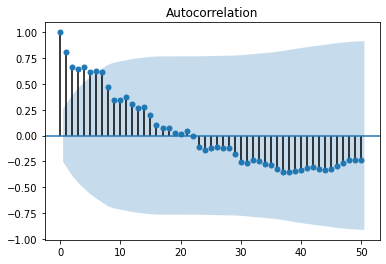

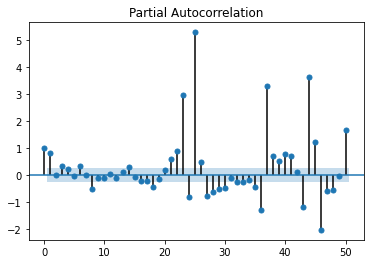

In [ ]:
# uji untuk mengetahui adanya musiman dan tren dengan ACF PACF kasus positif

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(datacovid['Kasus_Positif'], lags = 50)
pacf_plot = plot_pacf(datacovid['Kasus_Positif'], lags = 50)
# fig = sm.graphics.tsa.plot_acf(datacovid['Kasus_Sembuh'].values.squeeze(), lags = 50)

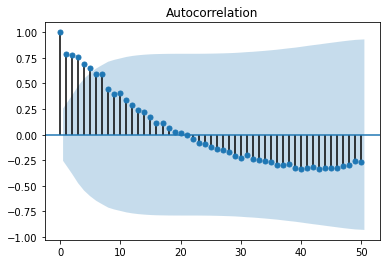

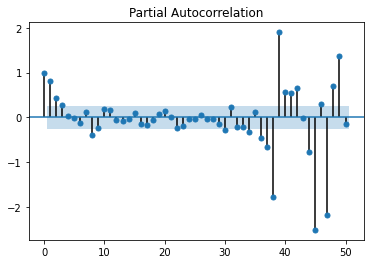

In [ ]:
# uji untuk mengetahui adanya musiman dan tren dengan ACF PACF kasus positif

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(datacovid['Kasus_Sembuh'], lags = 50)
pacf_plot = plot_pacf(datacovid['Kasus_Sembuh'], lags = 50)
# fig = sm.graphics.tsa.plot_acf(datacovid['Kasus_Sembuh'].values.squeeze(), lags = 50)

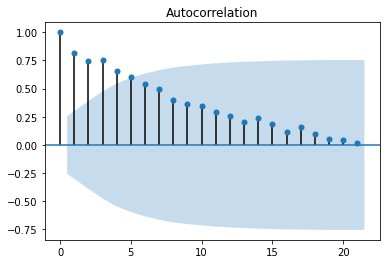

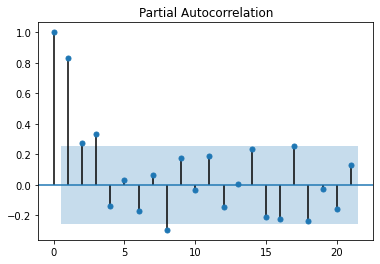

In [ ]:
# uji untuk mengetahui adanya musiman dan tren dengan ACF PACF kasus sembuh

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(datacovid['Kasus_Meninggal'], lags = 21)
pacf_plot = plot_pacf(datacovid['Kasus_Meninggal'], lags = 21)
# fig = sm.graphics.tsa.plot_acf(datacovid['Kasus_Sembuh'].values.squeeze(), lags = 50)

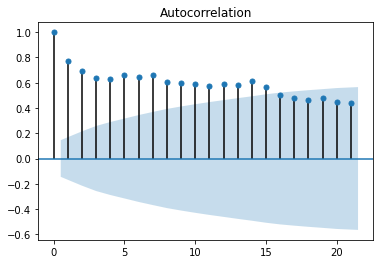

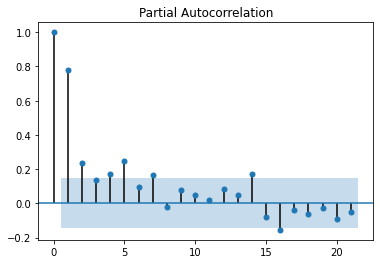

In [ ]:
# uji untuk mengetahui adanya musiman dan tren dengan ACF PACF kasus meninggal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(datacovid['Kasus_Meninggal'], lags = 21)
pacf_plot = plot_pacf(datacovid['Kasus_Meninggal'], lags = 21)
# fig = sm.graphics.tsa.plot_acf(datacovid['Kasus_Sembuh'].values.squeeze(), lags = 50)

# Pembuatan Model HWES

In [ ]:
# pembuatan model HWES
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

hwes = HWES(datacovid['Kasus_Meninggal'], trend="mul", seasonal="mul", seasonal_periods=7)
fitted = hwes.fit(optimized = True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   59
Model:             ExponentialSmoothing   SSE                           1773.060
Optimized:                         True   AIC                            222.773
Trend:                   Multiplicative   BIC                            245.625
Seasonal:                Multiplicative   AICC                           230.861
Seasonal Periods:                     7   Date:                 Thu, 02 Dec 2021
Box-Cox:                          False   Time:                         04:56:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0760235                alpha                 True
smoothing_slope          

In [ ]:
predict = fitted.predict(start = 0, end = 58)
print(predict)

2021-10-01    88.449804
2021-10-02    82.817455
2021-10-03    56.521006
2021-10-04    87.112442
2021-10-05    80.492969
2021-10-06    71.496452
2021-10-07    74.975530
2021-10-08    64.826303
2021-10-09    60.857645
2021-10-10    40.842573
2021-10-11    62.607769
2021-10-12    57.973491
2021-10-13    50.920912
2021-10-14    52.968575
2021-10-15    44.477018
2021-10-16    41.448937
2021-10-17    28.259920
2021-10-18    42.386013
2021-10-19    39.458751
2021-10-20    35.878715
2021-10-21    36.859175
2021-10-22    32.077353
2021-10-23    30.137948
2021-10-24    20.084123
2021-10-25    31.935604
2021-10-26    29.350188
2021-10-27    26.538848
2021-10-28    27.922439
2021-10-29    24.393140
2021-10-30    23.125384
2021-10-31    15.893373
2021-11-01    24.576279
2021-11-02    22.229604
2021-11-03    20.607851
2021-11-04    21.799866
2021-11-05    18.551512
2021-11-06    17.423816
2021-11-07    11.699198
2021-11-08    17.913712
2021-11-09    16.124582
2021-11-10    14.700090
2021-11-11    15

In [ ]:
MAPE = np.mean(np.abs((datacovid['Kasus_Meninggal']-predict)/datacovid['Kasus_Meninggal']))*100
print(MAPE, '%')

28.79823282294072 %


# Plotting hasil dari model dengan data aktual

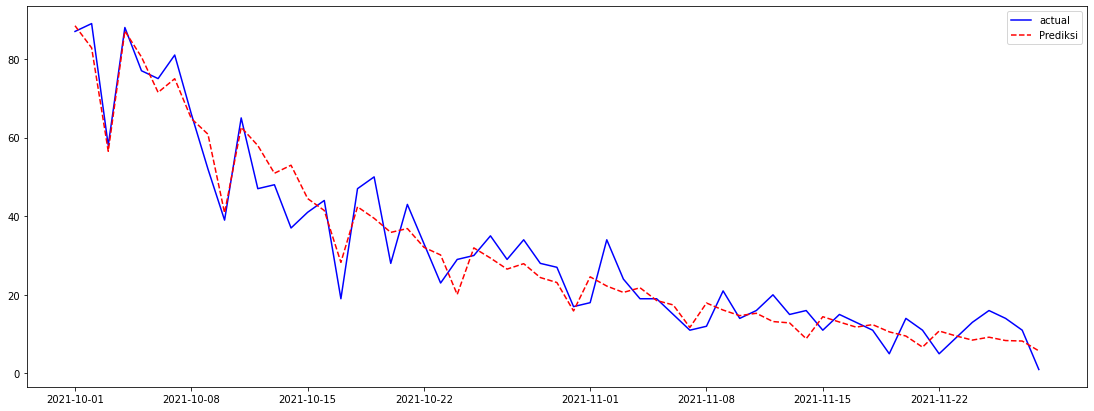

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(19,7))
plt.plot(datacovid['Kasus_Meninggal'], "b", label = "actual")
plt.plot(predict, "r--", label = "Prediksi")
plt.legend()

# Peramalan Periode kedepan

In [ ]:
prediksi = fitted.predict(len(datacovid['Kasus_Positif']), len(datacovid['Kasus_Positif'])+60)
prediksi

2021-11-29    6261.191457
2021-11-30    6135.754592
2021-12-01    4271.027610
2021-12-02    1987.484974
2021-12-03    6200.248014
                 ...     
2022-01-24   -5581.377692
2022-01-25   -5706.814558
2022-01-26   -7571.541539
2022-01-27   -9855.084176
2022-01-28   -5642.321135
Freq: D, Length: 61, dtype: float64

# download Hasil

In [ ]:
prediksi.to_excel('prediksi_kedepan2.xlsx', index = False)

# plotting hasil peramalan periode kedepan

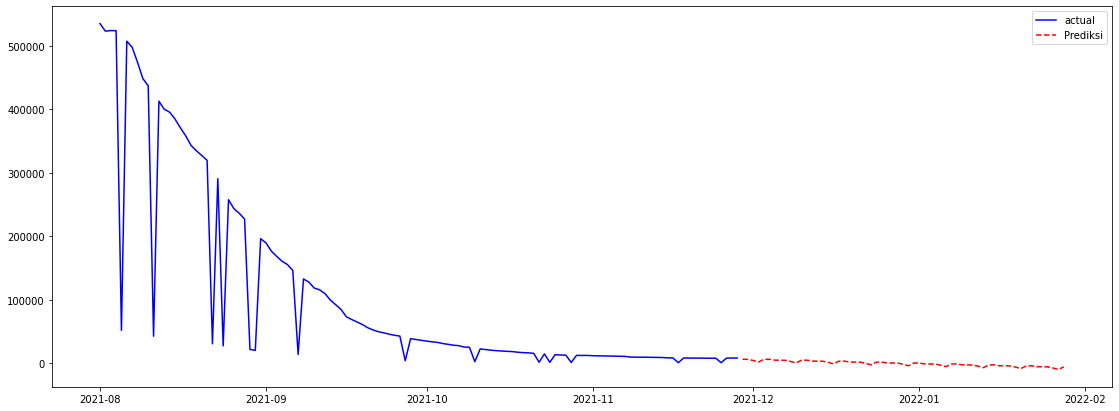

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(19,7))
plt.plot(datacovid['Kasus_Positif'], "b", label = "actual")
plt.plot(prediksi, "r--", label = "Prediksi")
plt.legend()

In [ ]:
# Moving Average

datacovid['Kasus_Positif'] = datacovid.Kasus_Positif.rolling(window=10).mean()

In [ ]:
datacovid.head(12)

,Kasus_Positif,Kasus_Sembuh,Kasus_Meninggal
2021-10-01,NaN,2811,87
2021-10-02,NaN,2380,89
2021-10-03,NaN,2020,58
2021-10-04,NaN,2656,88
2021-10-05,NaN,2558,77
2021-10-06,NaN,2851,75
2021-10-07,NaN,1946,81
2021-10-08,NaN,3514,66
2021-10-09,NaN,1507,52
2021-10-10,1282.8,1584,39
